# **ASSIGNMENT 6**: SVM for Iris classification

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [21]:
# load Iris dataset
iris = load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [22]:
# store Iris data in X
X = iris.data

# store Iris target in y
y = iris.target

In [23]:
# turning it into a DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df["species"] = y

In [24]:
# inspect the dataframe
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [25]:
def select_classes(df, classes=[0, 1]):
    df_binary = df[df["species"].isin(classes)]
    return df_binary


In [26]:
def svm(X_train, y_train, kernel="linear", degree=3, gamma="scale"):
    model = SVC(kernel=kernel, degree=degree, gamma=gamma)
    model.fit(X_train, y_train)
    return model

In [27]:
def evaluate_model(model, X_test, y_test, classes=None):
    y_pred = model.predict(X_test)
    
    if classes is None:
        classes_to_use = np.unique(y_test)
    else:
        classes_to_use = classes
    
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred, labels=classes_to_use)

    print("\nConfusion Matrix (only showing selected classes):")
    cm_df = pd.DataFrame(cm, index=[f"True {c}" for c in classes_to_use], columns=[f"Pred {c}" for c in classes_to_use])
    print(cm_df)
    
    print("Accuracy:", acc)


In [28]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    predictions = model.predict(grid_points)
    predictions = predictions.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, predictions, alpha=0.3, cmap=plt.cm.tab10)

    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="black", cmap=plt.cm.tab10)

    handles = []
    labels = []
    for class_value in np.unique(y):
        color = scatter.cmap(scatter.norm(class_value))
        handles.append(plt.Line2D([], [], marker='o', color='w',
                                  markerfacecolor=color, markeredgecolor='black', markersize=8))
        labels.append(f"Class {class_value}")
    plt.legend(handles, labels)

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.show()


---
---

In [29]:
selected_features = ["sepal length (cm)", "sepal width (cm)"]

#### **Main task**: Binary Classification

In [30]:
classes = [1,2]
df_binary = select_classes(df, classes)

In [31]:
X_binary = df_binary[selected_features].values
y_binary = df_binary["species"].values

X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

`Linear kernel`


Confusion Matrix (only showing selected classes):
        Pred 1  Pred 2
True 1      13       4
True 2       5       8
Accuracy: 0.7


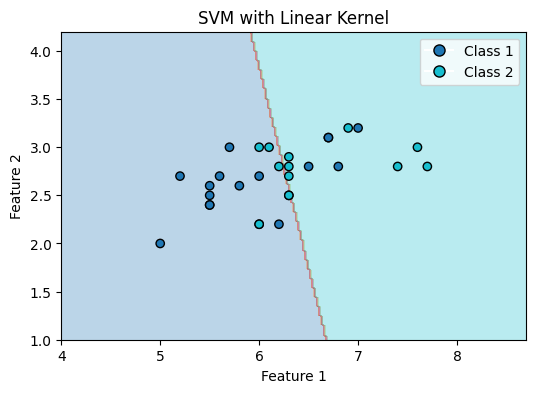

In [32]:
linear_binary = svm(X_train, y_train, kernel="linear")
evaluate_model(linear_binary, X_test, y_test)
plot_decision_boundary(linear_binary, X_test, y_test, "SVM with Linear Kernel")

`Polynomial kernel`


Confusion Matrix (only showing selected classes):
        Pred 1  Pred 2
True 1      12       5
True 2       4       9
Accuracy: 0.7


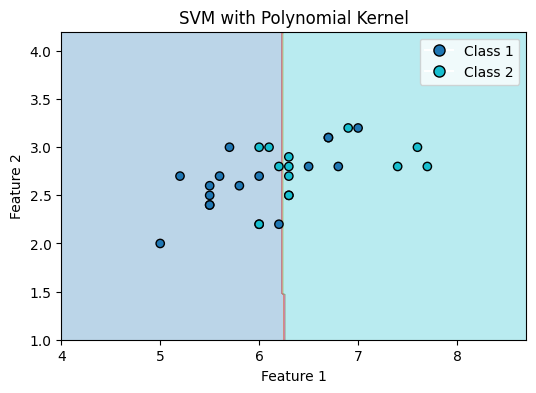

In [33]:
poly_binary = svm(X_train, y_train, kernel="poly", degree=3)
evaluate_model(poly_binary, X_test, y_test)
plot_decision_boundary(poly_binary, X_test, y_test, "SVM with Polynomial Kernel")


`RBF kernel`


Confusion Matrix (only showing selected classes):
        Pred 1  Pred 2
True 1      13       4
True 2       7       6
Accuracy: 0.6333333333333333


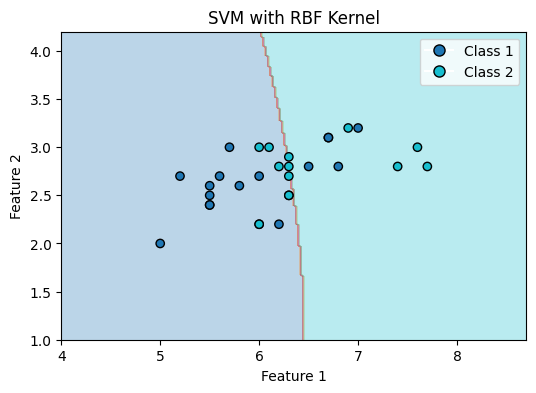

In [34]:
rbf_binary = svm(X_train, y_train, kernel="rbf")
evaluate_model(rbf_binary, X_test, y_test)
plot_decision_boundary(rbf_binary, X_test, y_test, "SVM with RBF Kernel")


**Interpreting results:** 
In this binary classification task, all three SVM kernels — linear, polynomial, and RBF — achieved moderate accuracy. This is because the two selected classes are not well-separated in the feature space (sepal length and sepal width), so the samples from the classes are somewhat mixed. As a result, no kernel could perfectly separate them. The linear kernel draws a straight boundary, which works reasonably well for overlapping data. The polynomial and RBF kernels can model more complex boundaries, but in this case, they do not provide a significant improvement, highlighting that the efficiency of each kernel strongly depends on how clearly the classes are separated.

#### **Extra task**: Multiclass Classification

In [35]:
X_multi = df[selected_features].values
y_multi = df["species"].values

X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.3, random_state=42)

`Linear kernel`


Confusion Matrix (only showing selected classes):
        Pred 0  Pred 1  Pred 2
True 0      19       0       0
True 1       0       7       6
True 2       0       3      10
Accuracy: 0.8


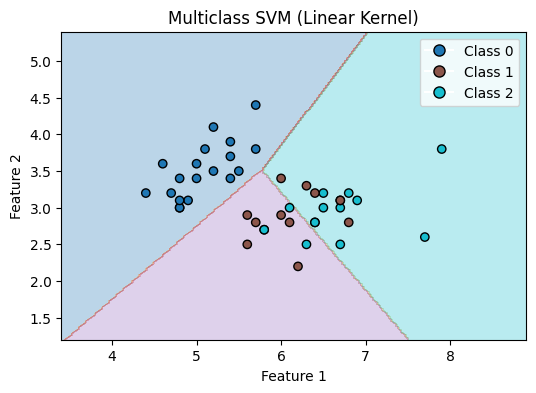

In [36]:
linear_multi = svm(X_train, y_train, kernel="linear")
evaluate_model(linear_multi, X_test, y_test)
plot_decision_boundary(linear_multi, X_test, y_test, "Multiclass SVM (Linear Kernel)")


`Polynomial kernel`


Confusion Matrix (only showing selected classes):
        Pred 0  Pred 1  Pred 2
True 0      19       0       0
True 1       0       7       6
True 2       0       6       7
Accuracy: 0.7333333333333333


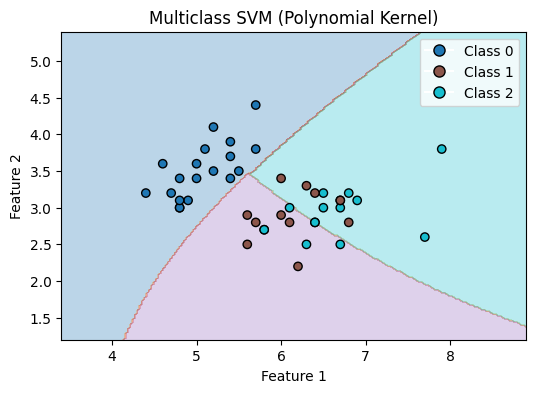

In [37]:
poly_multi = svm(X_train, y_train, kernel="poly", degree=3)
evaluate_model(poly_multi, X_test, y_test)
plot_decision_boundary(poly_multi, X_test, y_test, "Multiclass SVM (Polynomial Kernel)")


`RBF kernel`


Confusion Matrix (only showing selected classes):
        Pred 0  Pred 1  Pred 2
True 0      19       0       0
True 1       0       7       6
True 2       0       3      10
Accuracy: 0.8


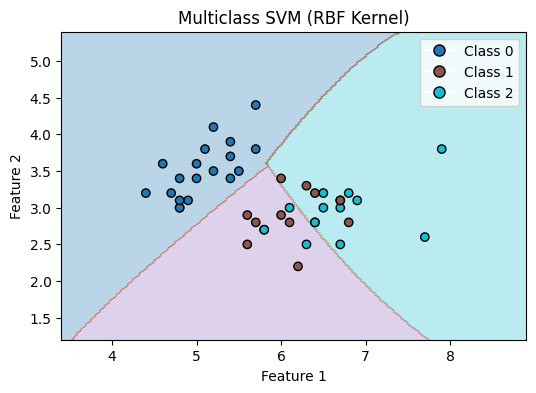

In [38]:
rbf_multi = svm(X_train, y_train, kernel="rbf")
evaluate_model(rbf_multi, X_test, y_test)
plot_decision_boundary(rbf_multi, X_test, y_test, "Multiclass SVM (RBF Kernel)")


**Observation:**
`One‑vs‑Rest (OvR)` and `One‑vs‑One (OvO)` are ways to make a binary classifier, like SVM, work for problems with more than two classes:

`One‑vs‑Rest (OvR)` trains one classifier for each class, trying to separate that class from all the others. For example, if there are 3 classes, it trains three SVMs: 0 vs {1,2}, 1 vs {0,2}, and 2 vs {0,1}. When predicting, the class whose classifier is most confident is chosen.

`One‑vs‑One (OvO)` trains a classifier for every pair of classes. In a 3-class problem, it builds 0 vs 1, 0 vs 2, and 1 vs 2. When predicting, all classifiers “vote,” and the class with the most votes wins.

In scikit-learn’s SVC, the default is One‑vs‑One. This means even though SVM is originally a binary classifier, it automatically combines multiple binary classifiers when there are more than two classes. That’s why the same svm() function works for both binary and multiclass classification — you just use all the class labels in the training data, and the SVM handles the rest.